In [24]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
exp_results_path = pathlib.Path('./results')
img_path = pathlib.Path('./img')
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', None)

In [2]:
exp1_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'all',
    'top-1',
    'num',
    'missing_labels',
    'timestamp'
]
exp2_names = exp1_names
exp3_names = exp1_names

exp4_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'all',
    'top-1',
    'num',
    'missing_labels',
    'round',
    'timestamp'
]

exp5_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'seed',
    'aggregation_alg',
    'protection',
    'index_privacy_r',
    'execution_time',
    'timestamp'
]

exp6_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'protection',
    'index_privacy_r',
    'dp',
    'epsilon',
    'delta',
    'all',
    'top-1',
    'missing_labels',
    'num',
    'timestamp'
]

exp7_names = [
    'algorithm',
    'num_of_parameters',
    'num_of_sparse_parameters',
    'num_of_clients',
    'load',
    'decryption',
    'aggregation',
    'total',
]

exp8_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'protection',
    'index_privacy_r',
    'dp',
    'epsilon',
    'delta',
    'sigma',
    'all',
    'top-1',
    'missing_labels',
    'num',
    'timestamp'
]

nn_color = 'red'
nn_single_color = 'green'
clustering_color = 'blue'

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')

legends = {
    'nn-all': r"$\mathtt{NN}$ $\mathit{all}$",
    'nn-single-all': r"$\mathtt{NN-single}$ $\mathit{all}$",
    'clustering-all': r"$\mathtt{Jac}$ $\mathit{all}$",
    'nn-top-1': r"$\mathtt{NN}$ $\mathit{top-1}$",
    'nn-single-top-1': r"$\mathtt{NN-single}$ $\mathit{top-1}$",
    'clustering-top-1': r"$\mathtt{Jac}$ $\mathit{top-1}$",
}

## exp1
- attack success rate for each dataset and global model
    - evaluation metrics: all and top-1
- fixed number of label

In [ ]:
exp1 = pd.read_csv(exp_results_path / 'exp1.csv', header=None, names=exp1_names, index_col=None)
exp1

In [ ]:
fig = plt.figure(dpi=200, figsize=(25, 4.5))

ax1 = fig.add_subplot(1, 5, 1)
exp1_minist = exp1[exp1['dataset'] == 'mnist']
x = exp1_minist['num_of_label_k'].unique()
nn_total = exp1_minist[exp1_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_minist[exp1_minist['attack'] == 'clustering']

ax1.set_title("MNIST (MLP)", fontsize=28)
ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=32)
ax1.set_xlabel("Class Labels", fontsize=32)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xticks(x)

handles, labels = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(1, 5, 2)
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_mlp = exp1_cifar10[exp1_cifar10['model'] == 'mlp']
x = exp1_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'clustering']

ax2.set_title("CIFAR10 (MLP)", fontsize=28)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Class Labels", fontsize=32)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xticks(x)


ax3 = fig.add_subplot(1, 5, 3)
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_cnn = exp1_cifar10[exp1_cifar10['model'] == 'cnn']
x = exp1_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'clustering']

ax3.set_title("CIFAR10 (CNN)", fontsize=28)

ax3.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax3.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax3.legend().remove()
ax3.set_ylabel("", fontsize=0)
ax3.set_xlabel("Class Labels", fontsize=32)

ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xticks(x)


ax4 = fig.add_subplot(1, 5, 4)
exp1_purchase100 = exp1[exp1['dataset'] == 'purchase100']
exp1_purchase100_mlp = exp1_purchase100[exp1_purchase100['model'] == 'mlp']
x = exp1_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'clustering']

ax4.set_title("Purchase100 (MLP)", fontsize=28)

ax4.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax4.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax4.legend().remove()
ax4.set_ylabel("", fontsize=0)
ax4.set_xlabel("Class Labels", fontsize=32)
ax4.set_xscale('log', base=2)

ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_xticks(x)

ax5 = fig.add_subplot(1, 5, 5)
exp1_cifar100 = exp1[exp1['dataset'] == 'cifar100']
exp1_cifar100_cnn = exp1_cifar100[exp1_cifar100['model'] == 'cnn']
x = exp1_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'clustering']

ax5.set_title("CIFAR100 (CNN)", fontsize=28)

# ax5.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

# ax5.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax5.legend().remove()
ax5.set_ylabel("", fontsize=0)
ax5.set_xlabel("Class Labels", fontsize=32)
ax5.set_xscale('log', base=2)

ax5.tick_params(axis='x', labelsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.set_xticks(x)

fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.18), fontsize=28)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-all-fix.png", bbox_inches = "tight")

In [ ]:
exp1_minist = exp1[exp1['dataset'] == 'mnist']
print(len(exp1_minist))
x = exp1_minist['num_of_label_k'].unique()
nn_total = exp1_minist[exp1_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_minist[exp1_minist['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-MNIST-mlp.png")

In [ ]:
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_mlp = exp1_cifar10[exp1_cifar10['model'] == 'mlp']
print(len(exp1_cifar10_mlp))
x = exp1_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR10 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-CIFAR10-mlp.png")

In [ ]:
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_cnn = exp1_cifar10[exp1_cifar10['model'] == 'cnn']
print(len(exp1_cifar10_cnn))
x = exp1_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR10 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-CIFAR10-cnn.png")

In [ ]:
exp1_purchase100 = exp1[exp1['dataset'] == 'purchase100']
exp1_purchase100_mlp = exp1_purchase100[exp1_purchase100['model'] == 'mlp']
print(len(exp1_purchase100_mlp))
x = exp1_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on Purchase100 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)
ax.set_xscale('log', base=2)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-purchase100-mlp.png")

In [ ]:
exp1_cifar100 = exp1[exp1['dataset'] == 'cifar100']
exp1_cifar100_cnn = exp1_cifar100[exp1_cifar100['model'] == 'cnn']
print(len(exp1_cifar100_cnn))
x = exp1_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR100 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)
ax.set_xscale('log', base=2)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-cifar100-cnn.png")

## exp2
- attack success rate for each dataset and global model
    - evaluation metrics: all and top-1
- random number of label

In [ ]:
exp2 = pd.read_csv(exp_results_path / 'exp2.csv', header=None, names=exp2_names, index_col=None)
exp2

In [ ]:
fig = plt.figure(dpi=200, figsize=(25, 4.5))

ax1 = fig.add_subplot(1, 5, 1)

exp2_minist = exp2[exp2['dataset'] == 'mnist']
x = exp2_minist['num_of_label_k'].unique()
nn_total = exp2_minist[exp2_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_minist[exp2_minist['attack'] == 'clustering']

ax1.set_title("MNIST (MLP)", fontsize=28)
ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=32)
ax1.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xticks(x)

handles, labels = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(1, 5, 2)
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_mlp = exp2_cifar10[exp2_cifar10['model'] == 'mlp']
x = exp2_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'clustering']

ax2.set_title("CIFAR10 (MLP)", fontsize=28)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Max Class Labels", fontsize=32)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xticks(x)


ax3 = fig.add_subplot(1, 5, 3)
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_cnn = exp2_cifar10[exp2_cifar10['model'] == 'cnn']
x = exp2_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'clustering']

ax3.set_title("CIFAR10 (CNN)", fontsize=28)

ax3.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax3.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax3.legend().remove()
ax3.set_ylabel("", fontsize=0)
ax3.set_xlabel("Max Class Labels", fontsize=32)

ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xticks(x)


ax4 = fig.add_subplot(1, 5, 4)
exp2_purchase100 = exp2[exp2['dataset'] == 'purchase100']
exp2_purchase100 = exp2_purchase100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_purchase100_mlp = exp2_purchase100[exp2_purchase100['model'] == 'mlp']
x = exp2_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'clustering']

ax4.set_title("Purchase100 (MLP)", fontsize=28)

ax4.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax4.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax4.legend().remove()
ax4.set_ylabel("", fontsize=0)
ax4.set_xlabel("Max Class Labels", fontsize=32)
ax4.set_xscale('log', base=2)

ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_xticks(x)

ax5 = fig.add_subplot(1, 5, 5)
exp2_cifar100 = exp2[exp2['dataset'] == 'cifar100']
# exp2_cifar100 = exp2_cifar100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_cifar100_cnn = exp2_cifar100[exp2_cifar100['model'] == 'cnn']
x = exp2_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'clustering']

ax5.set_title("CIFAR100 (CNN)", fontsize=28)

# ax5.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

# ax5.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax5.legend().remove()
ax5.set_ylabel("", fontsize=0)
ax5.set_xlabel("Max Class Labels", fontsize=32)
ax5.set_xscale('log', base=2)

ax5.tick_params(axis='x', labelsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.set_xticks(x)

# fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.15), fontsize=24)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-all-random.png", bbox_inches = "tight")

In [ ]:
exp2_minist = exp2[exp2['dataset'] == 'mnist']
print(len(exp2_minist))
x = exp2_minist['num_of_label_k'].unique()
nn_total = exp2_minist[exp2_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_minist[exp2_minist['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-MNIST-mlp.png")

In [ ]:
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_mlp = exp2_cifar10[exp2_cifar10['model'] == 'mlp']
print(len(exp2_cifar10_mlp))
x = exp2_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on CIFAR10 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-CIFAR10-mlp.png")

In [ ]:
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_cnn = exp2_cifar10[exp2_cifar10['model'] == 'cnn']
print(len(exp2_cifar10_cnn))
x = exp2_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on CIFAR10 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-CIFAR10-cnn.png")

In [ ]:
exp2_purchase100 = exp2[exp2['dataset'] == 'purchase100']
exp2_purchase100 = exp2_purchase100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_purchase100_mlp = exp2_purchase100[exp2_purchase100['model'] == 'mlp']
print(len(exp2_purchase100_mlp))
x = exp2_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on purchase100 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)
ax.set_xscale('log', base=2)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-purchase100-mlp.png")

In [ ]:
exp2_cifar100 = exp2[exp2['dataset'] == 'cifar100']
# exp2_cifar100 = exp2_cifar100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_cifar100_cnn = exp2_cifar100[exp2_cifar100['model'] == 'cnn']
print(len(exp2_cifar100_cnn))
x = exp2_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on cifar100 (CNN)", fontsize=20)

# ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

# ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xscale('log', base=2)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-cifar100-mlp.png")

## exp3
- Attack performance for each sparse ratio
- fixed-number
- inference number => 2

In [ ]:
exp3 = pd.read_csv(exp_results_path / 'exp3.csv', header=None, names=exp3_names, index_col=None)
exp3

In [ ]:
import matplotlib.ticker
exp3_mnist = exp3[exp3['dataset'] == 'mnist']
exp3_mnist = exp3_mnist[exp3_mnist['model'] == 'mlp']
x = exp3_mnist['alpha'].unique()
nn_total = exp3_mnist[exp3_mnist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_mnist[exp3_mnist['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("MNIST (MLP)", fontsize=24)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=1.4, marker="o", markersize=8)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=1.4, marker="v", markersize=8)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=1.4, marker="o", markersize=8)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=1.4, marker="v", markersize=8)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=28)
ax1.set_xlabel("Sparse ratio (log)", fontsize=28)

ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xscale('log', base=2)
# ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax1.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])
handles, labels = ax1.get_legend_handles_labels()


exp3_cifar100 = exp3[exp3['dataset'] == 'cifar100']
exp3_cifar100 = exp3_cifar100[exp3_cifar100['model'] == 'cnn']
x = exp3_cifar100['alpha'].unique()
nn_total = exp3_cifar100[exp3_cifar100['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_cifar100[exp3_cifar100['attack'] == 'clustering']


ax2 = fig.add_subplot(1, 2, 2)

ax2.set_title("CIFAR100 (CNN)", fontsize=24)

# ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=1.4, marker="v", markersize=8)

# ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=1.4, marker="v", markersize=8)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Sparse ratio (log)", fontsize=28)

ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xscale('log', base=2)
# ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax2.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])

fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.21), fontsize=18)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-sparse-rate.png", bbox_inches = "tight")

In [ ]:
import matplotlib.ticker
exp3_mnist = exp3[exp3['dataset'] == 'mnist']
exp3_mnist = exp3_mnist[exp3_mnist['model'] == 'mlp']
print(len(exp3_mnist))
x = exp3_mnist['alpha'].unique()
nn_total = exp3_mnist[exp3_mnist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_mnist[exp3_mnist['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)
ax.set_xscale('log', base=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-sparse-rate-mnist.png")

In [ ]:
exp3_cifar100 = exp3[exp3['dataset'] == 'cifar100']
exp3_cifar100 = exp3_cifar100[exp3_cifar100['model'] == 'cnn']
print(len(exp3_cifar100))
x = exp3_cifar100['alpha'].unique()
nn_total = exp3_cifar100[exp3_cifar100['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_cifar100[exp3_cifar100['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR100 (CNN)", fontsize=20)

# ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

# ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)
ax.set_xscale('log', base=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])
plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-sparse-rate-cifar100.png")

## exp4
- Relation between epoch and vulnerability
- random label, max label is 3

In [ ]:
exp4 = pd.read_csv(exp_results_path / 'exp4.csv', header=None, names=exp4_names, index_col=None)
exp4

In [ ]:
exp4_mnist_03 = exp4[exp4['dataset'] == 'mnist']
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['num_of_label_k'] == 5]
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['round'] <= 9]
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['model'] == 'mlp']
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['frac'] == 0.3]
print(len(exp4_mnist_03))
x = exp4_mnist_03['round'].unique()
nn_total = exp4_mnist_03[exp4_mnist_03['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp4_mnist_03[exp4_mnist_03['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Epochs", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-mnist-per-epochs-03.png")

In [ ]:
exp4_mnist_08 = exp4[exp4['dataset'] == 'mnist']
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['num_of_label_k'] == 5]
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['round'] <= 9]
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['model'] == 'mlp']
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['frac'] == 0.8]
print(len(exp4_mnist_08))
x = exp4_mnist_08['round'].unique()
nn_total = exp4_mnist_08[exp4_mnist_08['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp4_mnist_08[exp4_mnist_08['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP) frac=0.8", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Epochs", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-mnist-per-epochs-08.png")

In [ ]:
exp4_cifar10_03 = exp4[exp4['dataset'] == 'cifar10']
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['num_of_label_k'] == 5]
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['round'] <= 9]
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['model'] == 'cnn']
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['frac'] == 0.3]
print(len(exp4_cifar10_03))
x = exp4_cifar10_03['round'].unique()
nn_total = exp4_cifar10_03[exp4_cifar10_03['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp4_cifar10_03[exp4_cifar10_03['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR10 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Epochs", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-cifar10-per-epochs-03.png")

## exp5
- efficiency
- methods
    - baseline
    - advanced 
    - non-oblivious
    - path oram (Zerotrace)

In [ ]:
exp5 = pd.read_csv(exp_results_path / 'exp5.csv', header=None, names=exp5_names, index_col=None)
exp5

In [ ]:
exp5.loc[exp5['aggregation_alg'] == 'non_oblivious', 'aggregation_alg'] = 'Non Oblivious'
exp5.loc[exp5['aggregation_alg'] == 'advanced', 'aggregation_alg'] = 'Advanced'
exp5.loc[exp5['aggregation_alg'] == 'baseline', 'aggregation_alg'] = 'Baseline'
exp5.loc[exp5['aggregation_alg'] == 'path_oram', 'aggregation_alg'] = 'Path ORAM'

In [ ]:
# この結果でnum_users=10000の時にbaselineの方が早いのはなぜ？？？

exp5_mnist = exp5[exp5['dataset'] == 'mnist']
exp5_mnist_without_index_privacy = exp5_mnist[exp5_mnist['index_privacy_r'].isna()]
mnist_by_num_users = exp5_mnist_without_index_privacy.groupby(['num_users', 'aggregation_alg', 'alpha']).mean()
mnist_by_num_users = mnist_by_num_users.reset_index()
mnist_by_num_users_01 = mnist_by_num_users[mnist_by_num_users['alpha'] == 0.1]
print(len(mnist_by_num_users_01))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on MNIST (MLP) sparse ratio$=0.1$", fontsize=22)

sns.barplot(
    x = 'num_users', y = 'execution_time', hue = 'aggregation_alg', data = mnist_by_num_users_01, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=16)
ax.set_ylabel("Execution time [s]", fontsize=24)
ax.set_xlabel("Number of clients ($N$)\n (sampling rate $q=0.3$)", fontsize=22)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-mlp-01.png")


# exp5_mnist = exp5[exp5['dataset'] == 'mnist']
# exp5_mnist_without_index_privacy = exp5_mnist[exp5_mnist['index_privacy_r'].isna()]
# mnist_by_num_users = exp5_mnist_without_index_privacy.groupby(['num_users', 'aggregation_alg', 'alpha']).mean()
# mnist_by_num_users = mnist_by_num_users.reset_index()
# mnist_by_num_users_001 = mnist_by_num_users[mnist_by_num_users['alpha'] == 0.01]
# print(len(mnist_by_num_users_001))

# sns.set()
# sns.set_style('whitegrid')
# sns.set_palette('Paired')

# fig = plt.figure(dpi=200, figsize=(8, 4))
# ax = fig.add_subplot(1, 1, 1)

# ax.set_title("Performance on MNIST (MLP) sparse ratio=0.01", fontsize=22)

# sns.barplot(
#     x = 'num_users', y = 'execution_time', hue = 'aggregation_alg', data = mnist_by_num_users_001, 
#     palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
#     hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
# ax.set_yscale('log')

# ax.legend(fontsize=13)
# ax.set_ylabel("Execution time [s]", fontsize=24)
# ax.set_xlabel("Number of participatns per round", fontsize=22)
# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=15)

# plt.tight_layout()
# plt.show()

# fig.savefig(img_path / "oblivious-performances-mnist-mlp-001.png")

In [ ]:
exp5_mnist = exp5[exp5['dataset'] == 'mnist']
mnist_by_index_privacy_r = exp5_mnist.groupby(['alpha', 'index_privacy_r']).mean()
mnist_by_index_privacy_r = mnist_by_index_privacy_r.reset_index()
print(len(mnist_by_index_privacy_r))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on MNIST (MLP) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = mnist_by_index_privacy_r, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index set privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-mlp-index-privacy.png")

In [ ]:
exp5_cifar10 = exp5[exp5['dataset'] == 'cifar10']
exp5_cifar10_without_index_privacy = exp5_cifar10[exp5_cifar10['index_privacy_r'].isna()]
exp5_cifar10_without_index_privacy = exp5_cifar10_without_index_privacy.groupby(['aggregation_alg', 'alpha']).mean()
exp5_cifar10_without_index_privacy = exp5_cifar10_without_index_privacy.reset_index()
print(len(exp5_cifar10_without_index_privacy))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR10 (MLP)", fontsize=20)

sns.barplot(
    x = 'alpha', y = 'execution_time', hue = 'aggregation_alg', data = exp5_cifar10_without_index_privacy, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-cifar10.png")

In [ ]:
exp5_cifar10 = exp5[exp5['dataset'] == 'cifar10']
cifar10_by_index_privacy_r = exp5_cifar10.groupby(['alpha', 'index_privacy_r']).mean()
cifar10_by_index_privacy_r = cifar10_by_index_privacy_r.reset_index()
print(len(cifar10_by_index_privacy_r))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR10 (MLP) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = cifar10_by_index_privacy_r, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-cifar10-mlp-index-privacy.png")

In [ ]:
exp5_purchase100 = exp5[exp5['dataset'] == 'purchase100']
exp5_purchase100_without_index_privacy = exp5_purchase100[exp5_purchase100['index_privacy_r'].isna()]
exp5_purchase100_without_index_privacy = exp5_purchase100_without_index_privacy.groupby(['aggregation_alg', 'alpha']).mean()
exp5_purchase100_without_index_privacy = exp5_purchase100_without_index_privacy.reset_index()
print(len(exp5_purchase100_without_index_privacy))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on purchase100 (MLP)", fontsize=20)

sns.barplot(
    x = 'alpha', y = 'execution_time', hue = 'aggregation_alg', data = exp5_purchase100_without_index_privacy, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-purchase100.png")

In [ ]:
exp5_purchase100 = exp5[exp5['dataset'] == 'purchase100']
exp5_purchase100_by_index_privacy_r = exp5_purchase100.groupby(['alpha', 'index_privacy_r']).mean()
exp5_purchase100_by_index_privacy_r = exp5_purchase100_by_index_privacy_r.reset_index()
print(len(exp5_purchase100_by_index_privacy_r))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on purchase100 (MLP) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = exp5_purchase100_by_index_privacy_r, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-purchase100-mlp-index-privacy.png")

In [ ]:
exp5_cifar100 = exp5[exp5['dataset'] == 'cifar100']
exp5_cifar100_without_index_privacy = exp5_cifar100[exp5_cifar100['index_privacy_r'].isna()]
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy.groupby(['aggregation_alg', 'alpha']).mean()
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy.reset_index()
print(len(exp5_cifar100_without_index_privacy))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR100 (MLP)", fontsize=24)

sns.barplot(
    x = 'alpha', y = 'execution_time', hue = 'aggregation_alg', data = exp5_cifar100_without_index_privacy, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=16)
ax.set_ylabel("Execution time [s]", fontsize=24)
ax.set_xlabel("Sparse ratio", fontsize=28)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-cifar100.png")

In [ ]:
exp5_cifar100 = exp5[exp5['dataset'] == 'cifar100']
exp5_cifar100 = exp5_cifar100[exp5_cifar100['aggregation_alg'] == 'Non Oblivious']
exp5_cifar100_by_index_privacy_r = exp5_cifar100.groupby(['alpha', 'index_privacy_r']).mean()
exp5_cifar100_without_index_privacy = exp5_cifar100[exp5_cifar100['index_privacy_r'].isna()].groupby(['alpha']).mean()
exp5_cifar100_without_index_privacy['index_privacy_r'] = 0
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy.reset_index()
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy[(exp5_cifar100_without_index_privacy['alpha'] == 0.01) | (exp5_cifar100_without_index_privacy['alpha'] == 0.1)]
exp5_cifar100_by_index_privacy_r = exp5_cifar100_by_index_privacy_r.reset_index()
exp5_cifar100_by_index_privacy_r = exp5_cifar100_by_index_privacy_r[exp5_cifar100_by_index_privacy_r['index_privacy_r'] > 0.25]

data = pd.concat([exp5_cifar100_by_index_privacy_r, exp5_cifar100_without_index_privacy], axis= 0)
print(len(data))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR100 (CNN) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-cifar100-cnn-index-privacy.png")

## exp6
- protection

In [ ]:
exp6 = pd.read_csv(exp_results_path / 'exp6.csv', header=None, names=exp6_names, index_col=None)
exp6

In [ ]:
exp6_cifar10 = exp6[exp6['dataset'] == 'cifar10']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['alpha'] == 0.1]
exp6_cifar10 = exp6_cifar10[exp6_cifar10['model'] == 'cnn']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['protection'] == 'cacheline']
exp6_cifar10.loc[exp6_cifar10['single_model'] == True, 'attack'] = 'NN-single'
exp6_cifar10.loc[exp6_cifar10['attack'] == 'nn', 'attack'] = 'NN'
exp6_cifar10.loc[exp6_cifar10['protection'] == 'cacheline', 'protection'] = 'cacheline-level'
exp6_cifar10.loc[exp6_cifar10['attack'] == 'clustering', 'attack'] = 'Jac'


exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10 = exp1_cifar10[exp1_cifar10['model'] == 'cnn']
exp1_cifar10 = exp1_cifar10[exp1_cifar10['num_of_label_k'] == 3]
exp1_cifar10.insert(2, 'protection', 'address-level')
exp1_cifar10.loc[exp1_cifar10['single_model'] == True, 'attack'] = 'NN-single'
exp1_cifar10.loc[exp1_cifar10['attack'] == 'nn', 'attack'] = 'NN'

exp1_cifar10.loc[exp1_cifar10['attack'] == 'clustering', 'attack'] = 'Jac'

data = pd.concat([exp1_cifar10, exp6_cifar10], axis= 0)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 3))
ax = fig.add_subplot(1, 1, 1)

# ax.set_title("cacheline protection effects", fontsize=24)


sns.barplot(
    x = 'attack', y = 'all', hue = 'protection', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['address-level', 'cacheline-level'])

ax.legend(fontsize=18, loc='lower center')
ax.set_ylabel("Success rate", fontsize=24)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "cacheline-protection-cifar10-cnn.png")

## exp7
- perform on artificial data

In [3]:
exp7_results_path = pathlib.Path('../secure_aggregation/results')
li = []
for filename in exp7_results_path.glob('*.txt'):
    df = pd.read_csv(filename, index_col=None, header=0, names=exp7_names)
    li.append(df)
exp7 = pd.concat(li, axis=0, ignore_index=True)
exp7['algorithm'] = exp7['algorithm'].replace('\[\d\]: |Avg w\/o \[\d\] \(\d trial\): ', '', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('path_oram', 'Path ORAM', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('non_oblivious', 'Non Oblivious', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('advanced', 'Advanced', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('baseline', 'Baseline', regex=True)
# exp7['algorithm'] = exp7['algorithm'].replace('index_set_privacy_r_10', 'Index Set Privacy (r=10)', regex=True)

exp7 = exp7[exp7['num_of_parameters'] >= 10000]
exp7

,algorithm,num_of_parameters,num_of_sparse_parameters,num_of_clients,load,decryption,aggregation,total
0,optimized-108,201588,2015,10000,0.000003,8.830804,0.000000,8.836476
1,optimized-108,201588,2015,10000,0.000005,8.711964,0.000000,8.715067
2,optimized-108,201588,2015,10000,0.000005,8.802013,0.000000,8.804933
3,optimized-108,201588,2015,10000,0.000005,8.756989,0.000000,8.760000
4,optimized-185,50890,5089,10000,0.000004,14.786304,0.000000,14.788266
...,...,...,...,...,...,...,...,...
3087,optimized-191,201588,2015,10000,0.000004,13.691444,0.000000,13.694660
3088,optimized-191,201588,2015,10000,0.000005,13.737767,0.000000,13.740847
3089,Non Oblivious,5000000,50000,100,0.143221,0.155898,0.340398,0.902921
3090,Non Oblivious,5000000,50000,100,0.144382,0.155917,0.354479,0.837795


In [ ]:
filtered_exp7 = exp7[exp7['num_of_parameters'] != 50890]
filtered_exp7 = filtered_exp7[filtered_exp7['num_of_parameters'] != 201588]
exp7_aggregated = filtered_exp7.groupby(['algorithm', 'num_of_parameters', 'num_of_sparse_parameters', 'num_of_clients']).mean()
exp7_aggregated = exp7_aggregated.reset_index()
print(len(exp7_aggregated))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# ax.set_title("alpha=0.01, n=100", fontsize=24)

sns.barplot(
    x = 'num_of_parameters', y = 'total', hue = 'algorithm', data = exp7_aggregated, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    # hue_order=['Non Oblivious', 'Index Set Privacy (r=10)', 'Advanced', 'Baseline', 'Path ORAM'])
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)

ax.legend(fontsize=18)
ax.set_ylabel("Execution time [s]", fontsize=28)
ax.set_xlabel("Number of parameters", fontsize=28)
ax.tick_params(axis='x', labelsize=18)
ax.set_xticklabels([r'$1.0x10^4$','$5.0x10^4$', '$1.0x10^5$', '$5.0x10^5$', '$1.0x10^6$', '$5.0x10^6$', '$1.0x10^7$'])
ax.tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-artificial-data.png")

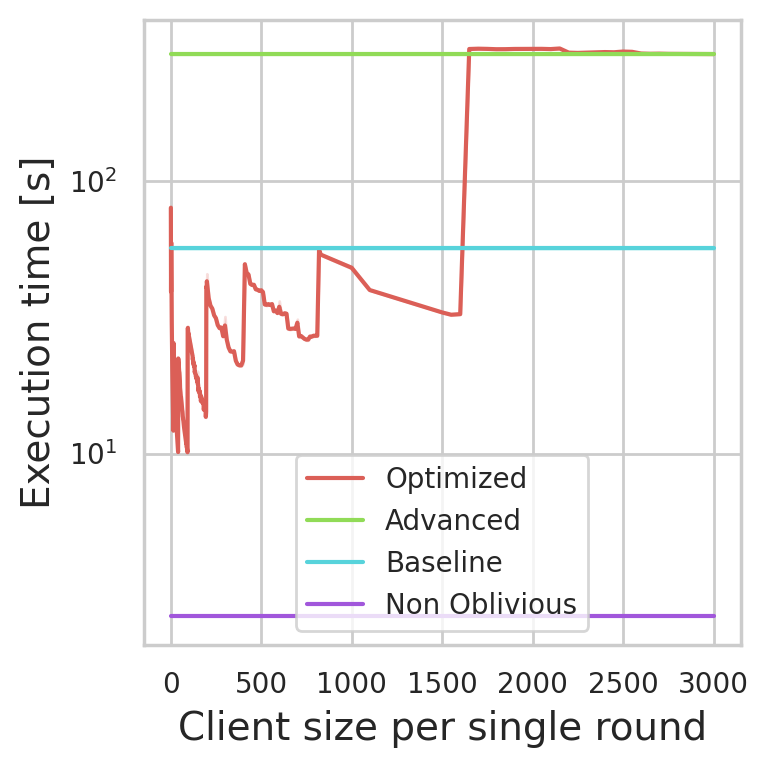

In [36]:
filtered_exp10 = exp7[exp7['num_of_parameters'] == 50890]
filtered_exp10 = filtered_exp10[filtered_exp10['num_of_clients'] == 10000]

import re
def extract_optimal_num_of_clients(s):
    if s.startswith('optimized'):
        match = re.findall(r'.*-(\d+)', s)
        return int(match[0])
    return 0

optimal_num_of_clients_list = [extract_optimal_num_of_clients(s) for s in filtered_exp10['algorithm']]
filtered_exp10['optimal_num_of_clients'] = optimal_num_of_clients_list

filtered_exp10['algorithm'] = filtered_exp10['algorithm'].replace(r'optimized-.*', 'Optimized', regex=True)

optimized_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Optimized']
op_max=optimized_filtered_exp10['optimal_num_of_clients'].max()
op_min=optimized_filtered_exp10['optimal_num_of_clients'].min()

baseline_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Baseline']
baseline_filtered_exp10_min = baseline_filtered_exp10.copy()
baseline_filtered_exp10_min['optimal_num_of_clients'] = op_min
baseline_filtered_exp10_max = baseline_filtered_exp10.copy()
baseline_filtered_exp10_max['optimal_num_of_clients'] = op_max
baseline_filtered_exp10 = pd.concat([baseline_filtered_exp10_min, baseline_filtered_exp10_max], ignore_index=True)

advanced_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Advanced']
advanced_filtered_exp10_min = advanced_filtered_exp10.copy()
advanced_filtered_exp10_min['optimal_num_of_clients'] = op_min
advanced_filtered_exp10_max = advanced_filtered_exp10.copy()
advanced_filtered_exp10_max['optimal_num_of_clients'] = op_max
advanced_filtered_exp10 = pd.concat([advanced_filtered_exp10_min, advanced_filtered_exp10_max], ignore_index=True)

non_oblivious_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Non Oblivious']
non_oblivious_filtered_exp10_min = non_oblivious_filtered_exp10.copy()
non_oblivious_filtered_exp10_min['optimal_num_of_clients'] = op_min
non_oblivious_filtered_exp10_max = non_oblivious_filtered_exp10.copy()
non_oblivious_filtered_exp10_max['optimal_num_of_clients'] = op_max
non_oblivious_filtered_exp10 = pd.concat([non_oblivious_filtered_exp10_min, non_oblivious_filtered_exp10_max], ignore_index=True)

final_data = pd.concat([baseline_filtered_exp10, optimized_filtered_exp10, advanced_filtered_exp10, non_oblivious_filtered_exp10], ignore_index=True)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)

# ax.set_title("alpha=0.01, n=100", fontsize=24)

PALETTE = sns.color_palette()

sns.lineplot(
    x = 'optimal_num_of_clients', y = 'total', hue="algorithm", data = final_data,
    ax=ax, palette='hls', hue_order=['Optimized', 'Advanced', 'Baseline', 'Non Oblivious']
)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.legend(fontsize=10)
ax.set_ylabel("Execution time [s]", fontsize=14)
ax.set_xlabel("Client size per single round", fontsize=14)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "client-optimized-MNIST.png", bbox_inches = "tight")

In [39]:
# optimized_filtered_exp10.sort_values('total', ascending=False)
# optimized_filtered_exp10.sort_values('optimal_num_of_clients', ascending=False)

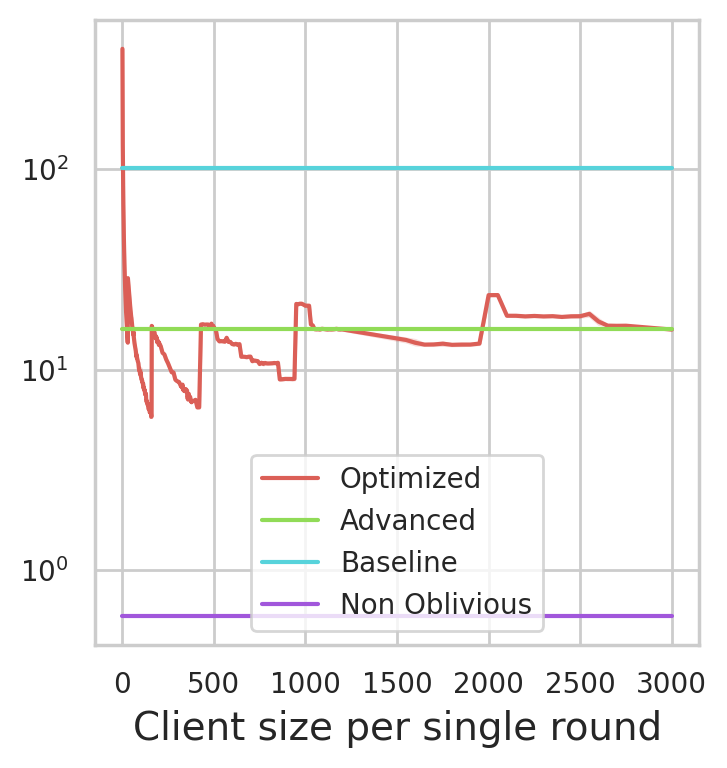

In [40]:
filtered_exp10 = exp7[exp7['num_of_parameters'] == 201588]
filtered_exp10 = filtered_exp10[filtered_exp10['num_of_clients'] == 10000]

import re
def extract_optimal_num_of_clients(s):
    if s.startswith('optimized'):
        match = re.findall(r'.*-(\d+)', s)
        return int(match[0])
    return 0

optimal_num_of_clients_list = [extract_optimal_num_of_clients(s) for s in filtered_exp10['algorithm']]
filtered_exp10['optimal_num_of_clients'] = optimal_num_of_clients_list

filtered_exp10['algorithm'] = filtered_exp10['algorithm'].replace(r'optimized-.*', 'Optimized', regex=True)

optimized_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Optimized']
op_max=optimized_filtered_exp10['optimal_num_of_clients'].max()
op_min=optimized_filtered_exp10['optimal_num_of_clients'].min()

baseline_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Baseline']
baseline_filtered_exp10_min = baseline_filtered_exp10.copy()
baseline_filtered_exp10_min['optimal_num_of_clients'] = op_min
baseline_filtered_exp10_max = baseline_filtered_exp10.copy()
baseline_filtered_exp10_max['optimal_num_of_clients'] = op_max
baseline_filtered_exp10 = pd.concat([baseline_filtered_exp10_min, baseline_filtered_exp10_max], ignore_index=True)

advanced_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Advanced']
advanced_filtered_exp10_min = advanced_filtered_exp10.copy()
advanced_filtered_exp10_min['optimal_num_of_clients'] = op_min
advanced_filtered_exp10_max = advanced_filtered_exp10.copy()
advanced_filtered_exp10_max['optimal_num_of_clients'] = op_max
advanced_filtered_exp10 = pd.concat([advanced_filtered_exp10_min, advanced_filtered_exp10_max], ignore_index=True)

non_oblivious_filtered_exp10 = filtered_exp10[filtered_exp10['algorithm']=='Non Oblivious']
non_oblivious_filtered_exp10_min = non_oblivious_filtered_exp10.copy()
non_oblivious_filtered_exp10_min['optimal_num_of_clients'] = op_min
non_oblivious_filtered_exp10_max = non_oblivious_filtered_exp10.copy()
non_oblivious_filtered_exp10_max['optimal_num_of_clients'] = op_max
non_oblivious_filtered_exp10 = pd.concat([non_oblivious_filtered_exp10_min, non_oblivious_filtered_exp10_max], ignore_index=True)

final_data = pd.concat([baseline_filtered_exp10, optimized_filtered_exp10, advanced_filtered_exp10, non_oblivious_filtered_exp10], ignore_index=True)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(3.8, 4))
ax = fig.add_subplot(1, 1, 1)

# ax.set_title("alpha=0.01, n=100", fontsize=24)

PALETTE = sns.color_palette()

sns.lineplot(
    x = 'optimal_num_of_clients', y = 'total', hue="algorithm", data = final_data,
    ax=ax, palette='hls', hue_order=['Optimized', 'Advanced', 'Baseline', 'Non Oblivious']
)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.legend(fontsize=10)
ax.set_ylabel("", fontsize=14)
ax.set_xlabel("Client size per single round", fontsize=14)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "client-optimized-CIFAR100.png", bbox_inches = "tight")

In [42]:
# optimized_filtered_exp10.sort_values('total')

## Exp8

In [ ]:
exp8 = pd.read_csv(exp_results_path / 'exp8.csv', header=None, names=exp8_names, index_col=None)
exp8

In [ ]:
exp8_cifar10 = exp8[exp8['dataset'] == 'cifar10']
exp8_cifar10.loc[exp8_cifar10['sigma'].isna(), 'sigma'] = 0.0
exp8_cifar10 = exp8_cifar10[exp8_cifar10['sigma'] < 10]
exp8_cifar10_mlp = exp8_cifar10[exp8_cifar10['model'] == 'mlp']
sigma = exp8_cifar10_mlp['sigma'].unique()
nn_total = exp8_cifar10_mlp[exp8_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]

fig = plt.figure(dpi=200, figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("CIFAR10 (MLP)", fontsize=20)

ax.plot(sigma, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="x", markersize=12)

ax.plot(sigma, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="x", markersize=12)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Sigma (=noise multiplier)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(sigma)
ax.set_xscale('log', base=2)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-dp-CIFAR10-mlp.png")

In [ ]:
exp8_cifar10 = exp8[exp8['dataset'] == 'cifar10']
exp8_cifar10.loc[exp8_cifar10['sigma'].isna(), 'sigma'] = 0.0
exp8_cifar10 = exp8_cifar10[exp8_cifar10['sigma'] < 10]
exp8_cifar10_cnn = exp8_cifar10[exp8_cifar10['model'] == 'cnn']
sigma = exp8_cifar10_cnn['sigma'].unique()
nn_total = exp8_cifar10_cnn[exp8_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]

fig = plt.figure(dpi=200, figsize=(8, 3))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("CIFAR10 (CNN)", fontsize=20)

ax.plot(sigma, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="x", markersize=12)

ax.plot(sigma, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="x", markersize=12)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Sigma (=noise multiplier)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(sigma)
ax.set_xscale('log', base=2)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-dp-CIFAR10-cnn.png")